In [1]:
import numpy as np
import pandas as pd

In [2]:
#random seed

np.random.seed(42)

set1no = 900
set2no = 100

In [3]:
df1 = pd.DataFrame({
    
    "feature_1": np.random.normal(loc=0, scale=1, size=set1no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set1no),
    "target" : [0] * set1no
})

df2 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0, scale=1, size=set2no),
    "feature_2": np.random.normal(loc=0, scale=1, size=set2no),
    "target" : [1] * set2no
})

In [4]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [5]:
df2.head()

,feature_1,feature_2,target
0,1.901191,0.696954,1
1,-0.060661,-0.333819,1
2,-0.708407,1.173125,1
3,-1.513714,0.369642,1
4,-1.803140,-0.107302,1


In [6]:
df = pd.concat([df1, df2]).reset_index(drop=True)

In [7]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [8]:
df["target"].unique()

array([0, 1])

In [9]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [10]:
#upsampling -> upsample minority

In [11]:
#downsampling -> downsample majority

In [13]:
# upsampling

In [21]:
df_minority = df[df["target"] == 1]

In [22]:
df_minority

,feature_1,feature_2,target
900,1.901191,0.696954,1
901,-0.060661,-0.333819,1
902,-0.708407,1.173125,1
903,-1.513714,0.369642,1
904,-1.803140,-0.107302,1
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [23]:
df_majority = df[df["target"] == 0]

In [24]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [25]:
from sklearn.utils import resample

In [27]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [28]:
df_minority_upsampled.shape

(900, 3)

In [29]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1


In [30]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [32]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [34]:
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)

In [36]:
df_majority_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [37]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [39]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [40]:
# SMOTE (Synthetic Minority Over-sampling Technique)

In [41]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


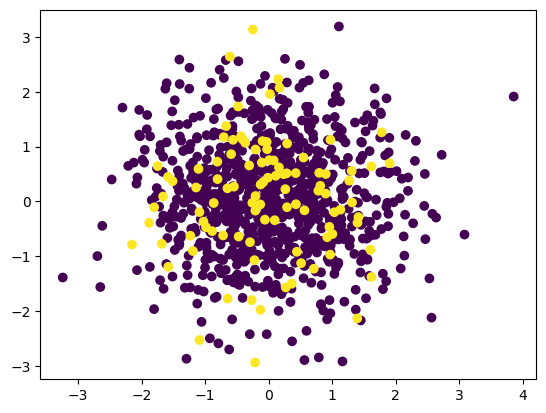

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
oversample = SMOTE()

In [48]:
(X, y) = oversample.fit_resample(df[["feature_1", "feature_2"]], df["target"])

In [49]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.701868,-0.173309
1796,1.545917,-1.335943
1797,1.358114,-0.225781
1798,0.486916,-0.147628


In [50]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [51]:
type(X)

pandas.core.frame.DataFrame

In [52]:
oversample_df = pd.concat([X,y],axis=1)

In [54]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

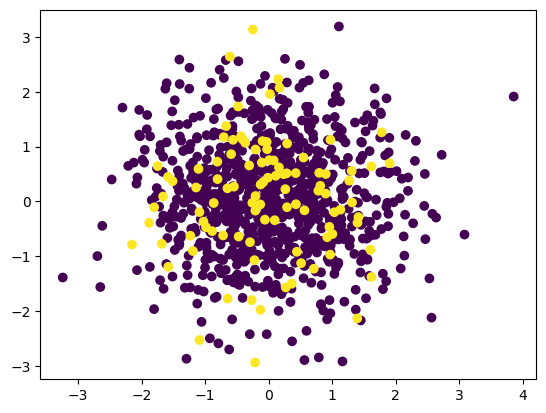

In [55]:
plt.scatter(df["feature_1"], df["feature_2"], c=df["target"])

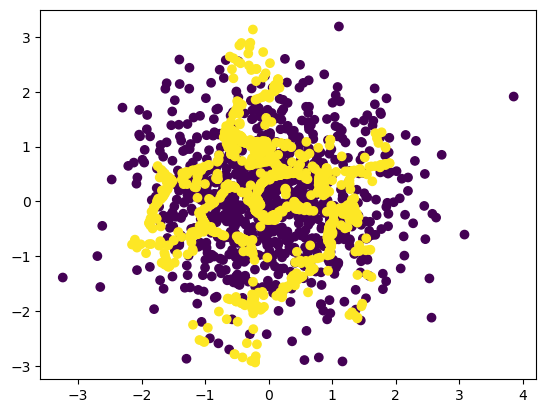

In [56]:
plt.scatter(oversample_df["feature_1"], oversample_df["feature_2"], c=oversample_df["target"])